# Predicting cars Prices using the KneighborsRegressor class

In [189]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('data/imports-85.data', names=cols)

In [170]:
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


## Let's replace the character, '?', with None for missing values

In [171]:
cars = cars.replace('?',np.nan)

In [172]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [173]:
# Convert all numeric values into float type
numeric_cars = numeric_cars.astype('float')
# Display the count of missing values per column
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can see that there are 4 missing values in the 'price' column. We can entirely supress the corresponding lines as the price is our target.

In [174]:
numeric_cars = numeric_cars.dropna(subset=['price'])

We can then replace any other missing column value with the column mean.

In [175]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

Let's then normalise all the dataframe values: rescale the values in the numeric columns so they all range from 0 to 1.

In [176]:
normalised_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

The target column don't have to be normalised:

In [177]:
normalised_cars['price'] = numeric_cars['price']

Let's define the knn_train_test() function. This function should have 4 parameters:
* the list of the training column names
* the target column name
* the dataframe object
* the list of k values (k stands for the number of neighbors implied in the calculation)
This function returns a dictionary which k values are the keys and the root mean squared values are the values.


In [178]:
def knn_train_test(cols, target_col, df, k_values = [5]):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(len(df))
    df = df.iloc[shuffled_index]

    # Divide number of rows in half and round.
    last_train_row = len(df) // 2
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = df.iloc[0:last_train_row]
    test_df = df.iloc[last_train_row:]
    
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
cols = numeric_cars.columns.drop('price')
for col in cols:
    rmse_val = knn_train_test([col], 'price', normalised_cars, [1,3,5,7,9])
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city-mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.0548480378011,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.8118602771337,
  9: 4515.1356174191033},
 'length': {1: 4628.45550

Let's plot the rmse values over the k values for all features:

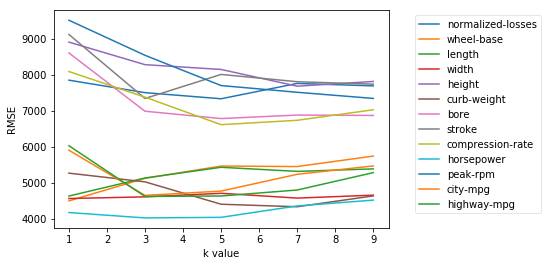

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

for column,v in k_rmse_results.items():

    x = list(v.keys())
    y = list(v.values())
   
    plt.plot(x,y, label=column)
plt.xlabel('k value')
plt.ylabel('RMSE')

plt.legend(framealpha=0.5, bbox_to_anchor=(1.47, 1))
   


Let's use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value. Then let's use the best 3 features, the best 4 features, and the best 5 features using the defaults k value. 

In [180]:
for col in train_cols:
    rmse_val = knn_train_test([col], 'price', normalised_cars)
    k_rmse_results[col] = np.mean(list(rmse_val.values()))
sorted(k_rmse_results.items(), key=lambda x: x[1])

[('horsepower', 4037.0377131537603),
 ('curb-weight', 4401.1182547931239),
 ('highway-mpg', 4630.0267985880564),
 ('width', 4704.4825897043856),
 ('city-mpg', 4766.4225050901341),
 ('length', 5427.2009608367125),
 ('wheel-base', 5461.5539978730567),
 ('compression-rate', 6610.8121531591287),
 ('bore', 6780.6277846859757),
 ('normalized-losses', 7330.1976534344449),
 ('peak-rpm', 7697.4596964334805),
 ('stroke', 8006.5295446471009),
 ('height', 8144.4410426637469)]

Features ordered from their rmse values:
1. horsepower
2. curb-weight
3. highway-mpg
4. width
5. city-mpg
6. length
7. wheel-base

In [181]:
k_rmse_results = {}
two_best_features = ['horsepower', 'curb-weight']
rmse_val = knn_train_test(two_best_features, 'price', normalised_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(three_best_features, 'price', normalised_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'curb-weight', 'highway-mpg', 'width']
rmse_val = knn_train_test(four_best_features, 'price', normalised_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg']
rmse_val = knn_train_test(five_best_features, 'price', normalised_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg', 'length']
rmse_val = knn_train_test(five_best_features, 'price', normalised_cars)
k_rmse_results["six best features"] = rmse_val

seven_best_features = ['horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg', 'length', 'wheel-base']
rmse_val = knn_train_test(five_best_features, 'price', normalised_cars)
k_rmse_results["seven best features"] = rmse_val

sorted(k_rmse_results.items(), key=lambda x: x[1][5])

[('two best features', {5: 3257.8490494359762}),
 ('five best features', {5: 3341.6024539726504}),
 ('six best features', {5: 3341.6024539726504}),
 ('seven best features', {5: 3341.6024539726504}),
 ('four best features', {5: 3358.6915801682458}),
 ('three best features', {5: 3365.9110004529675})]

For the top 3 models in the last step, let's vary the k parameter value from 1 to 25 and plot the resulting RMSE values.


In [190]:
k_rmse_results = {}
two_best_features = ['horsepower', 'curb-weight']
rmse_val = knn_train_test(two_best_features, 'price', normalised_cars, range(1, 26))
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(three_best_features, 'price', normalised_cars, range(1, 26))
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'curb-weight', 'highway-mpg', 'width']
rmse_val = knn_train_test(four_best_features, 'price', normalised_cars, range(1, 26))
k_rmse_results["four best features"] = rmse_val

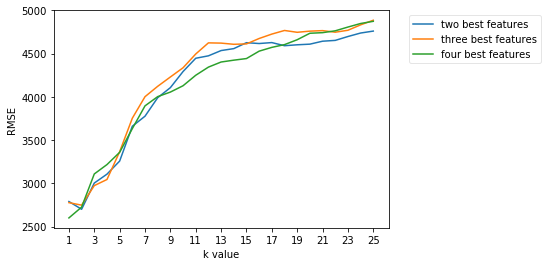

In [188]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label=k)
    plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.xlabel('k value')
plt.ylabel('RMSE')


plt.legend(framealpha=0.5, bbox_to_anchor=(1.47, 1))

In [ ]:
To be continued...